<a href="https://colab.research.google.com/github/Eminent01/Baum-Tenpers-Research/blob/main/Baum_Tenper_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These colab notebook is for the algorithm implimentation of the GARCH Neural network, Linear,LASSO, Ridge and Elastic net regression

Let's first call out all the required package for the algorithm

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#Importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import timedelta

Importing the Data set from the local Drive

In [3]:
data = pd.read_csv("/content/NSE 30 Historical Data.csv" , thousands =',')

In [4]:
data.set_index('Date', inplace=True)
data.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Feb 03, 2012",942.22,938.12,942.49,936.86,-,0.44%
"Feb 02, 2012",938.12,936.18,938.18,931.00,-,0.30%
"Feb 01, 2012",935.36,936.70,940.17,934.06,-,-0.15%
"Jan 31, 2012",936.78,928.22,937.04,928.13,-,0.92%
"Jan 30, 2012",928.22,936.13,936.81,928.07,-,-0.84%


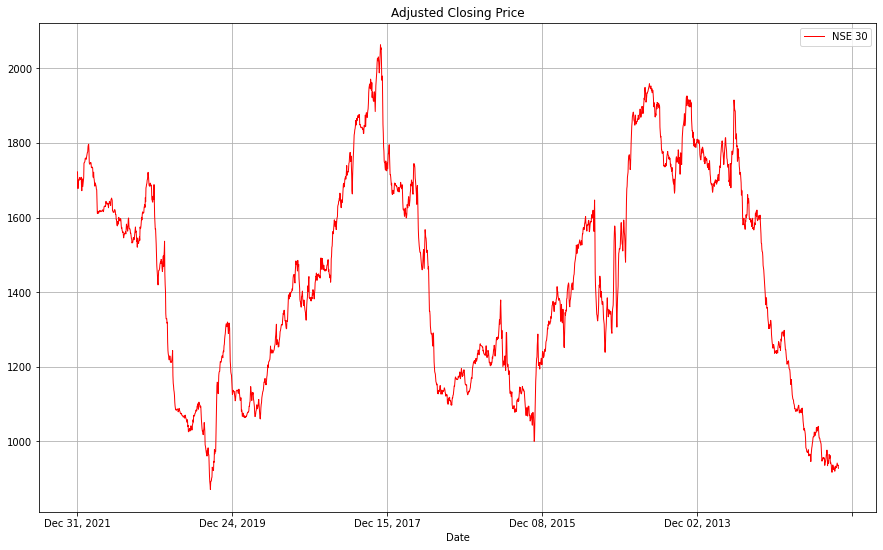

In [11]:
data['Price'].plot(label='NSE 30', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [6]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it
close_col = data['Price']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

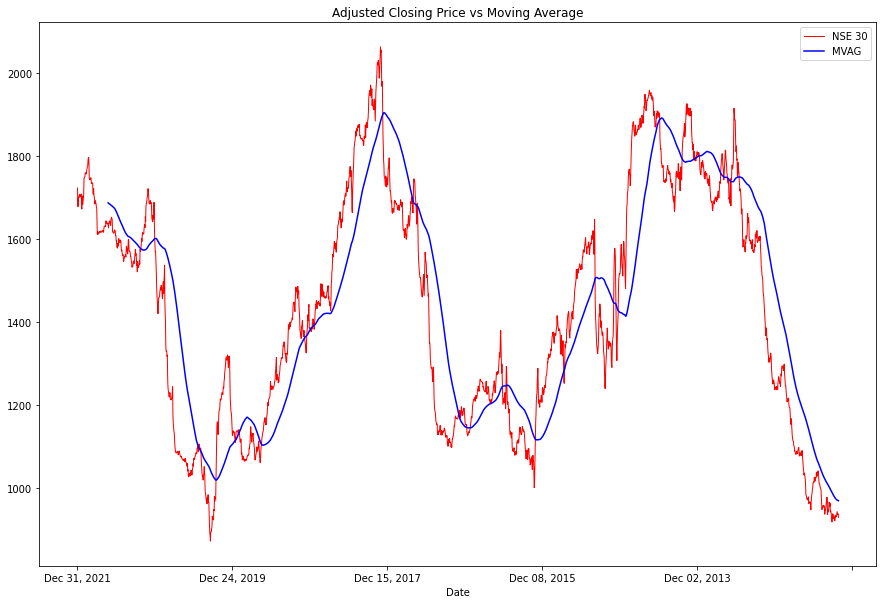

In [7]:
# Visualizing Rolling Mean and Adjusted Closing Price together
data['Price'].plot(label='NSE 30', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [13]:
# Data engineering 
data['Vol.'] = data['Vol.'].str.replace('M', "")
data['Change %'] = data['Change %'].str.replace('%', "")
# data['Date'] = pd.to_datetime(data['Date'])

In [14]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors ='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors ='coerce')

In [15]:
#Checking the dimension of the dataset
data.shape

(2457, 6)

In [16]:
#Printing the first 5 rows of the dataset 
data.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Dec 31, 2021",1722.30,1677.94,1723.30,1675.71,268.50,2.67
"Dec 30, 2021",1677.48,1677.67,1678.33,1674.86,123.11,-0.01
"Dec 29, 2021",1677.67,1700.61,1702.19,1674.41,75.89,-1.35
"Dec 24, 2021",1700.61,1699.87,1700.99,1698.59,63.63,0.13
"Dec 23, 2021",1698.44,1699.38,1700.27,1697.25,63.39,-0.06


In [17]:
#Summary statistics of the data
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,2457.000000,2457.000000,2457.000000,2457.000000,1156.000000,2457.000000
mean,1432.597570,1432.248433,1439.576675,1424.337566,193.019464,0.030077
std,285.008179,285.073439,286.068201,283.587090,124.748674,1.031463
min,871.260000,871.960000,884.640000,870.340000,38.030000,-5.540000
25%,1178.550000,1178.020000,1184.190000,1172.850000,109.785000,-0.450000
50%,1424.600000,1421.800000,1433.640000,1415.660000,159.710000,-0.010000
75%,1683.720000,1682.940000,1689.430000,1675.440000,238.182500,0.480000
max,2062.610000,2062.610000,2073.000000,2038.690000,970.690000,8.790000


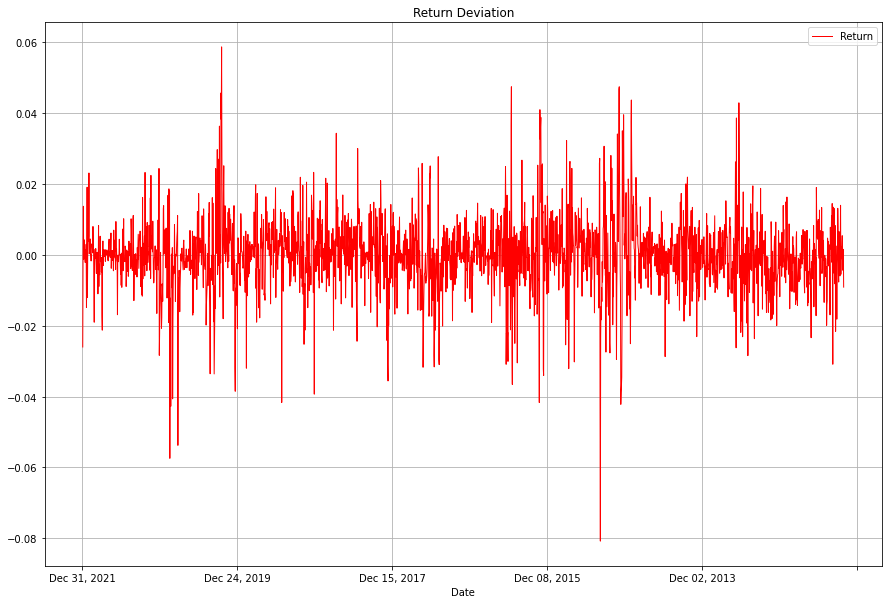

In [18]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome
rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

##Exploratory Data Analysis

In [19]:
#Correlation of the variables to check the importance of all the variables with thenprice variable
data.corr()

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.998730,0.999504,0.999393,0.145302,0.012553
Open,0.998730,1.000000,0.999403,0.999381,0.135238,-0.036340
High,0.999504,0.999403,1.000000,0.999155,0.149434,-0.009854
Low,0.999393,0.999381,0.999155,1.000000,0.131777,-0.011766
Vol.,0.145302,0.135238,0.149434,0.131777,1.000000,0.200179
Change %,0.012553,-0.036340,-0.009854,-0.011766,0.200179,1.000000


In [34]:
data = data.drop(['Vol.'], axis= 1)

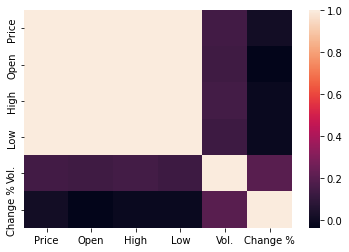

In [20]:
#Heatmap plot 
corrmap=sns.heatmap(data.corr())

In [21]:
## Saving the heatmap plot
plt.savefig('corrmap.jpeg')

<Figure size 432x288 with 0 Axes>

In [22]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2457 entries, Dec 31, 2021 to Jan 30, 2012
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2457 non-null   float64
 1   Open      2457 non-null   float64
 2   High      2457 non-null   float64
 3   Low       2457 non-null   float64
 4   Vol.      1156 non-null   float64
 5   Change %  2457 non-null   float64
dtypes: float64(6)
memory usage: 198.9+ KB


#Histogram for the price

(array([111., 286., 346., 317., 254., 258., 362., 294., 187.,  42.]),
 array([ 871.26 ,  990.395, 1109.53 , 1228.665, 1347.8  , 1466.935,
        1586.07 , 1705.205, 1824.34 , 1943.475, 2062.61 ]),
 <a list of 10 Patch objects>)

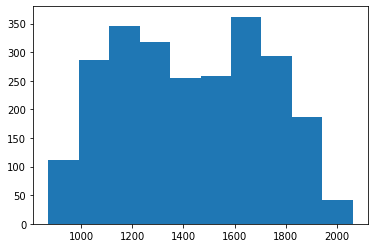

In [23]:
plt.hist(data['Price'])

#Stock price series plot

###Data Visualization

Text(0, 0.5, 'Stock Price')

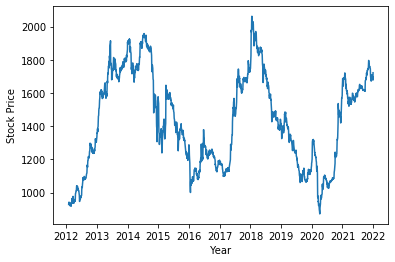

In [ ]:
plt.plot(data['Date'], data["Price"])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


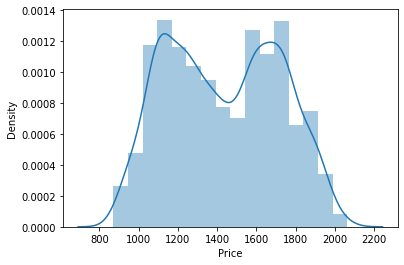

In [ ]:
sns.distplot(data['Price'])

In [35]:
# Number of days for which to predict the stock prices
predict_days = 30

In [36]:
# Shifting by the Number of Predict days for Prediction array
data['Prediction'] = data['Price'].shift(-predict_days)

In [37]:
# Dropping the Prediction Row
X = np.array(data.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(2427, 5)


In [38]:
# Creating the Prediction Row
y = np.array(data['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(2427,)


In [39]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1941, 5)
(1941,)
(486, 5)
(486,)


In [24]:
# create an autocorrelation plot
# from pandas.plotting import autocorrelation_plot

# autocorrelation_plot(data['Price'])

#Transformation of the data

In [ ]:
# from scipy.special import inv_boxcox
# from typing import Tuple

In [ ]:
# # Define power trnnsformations and their inverses
# # Square root transformation
# def square_root_transformation(x: pd.Series) -> pd.Series:
#     return np.sqrt(x)

# def square_root_inverse_transformation(x: pd.Series) -> pd.Series:
#     return np.square(x)

# # Cube root transformation
# def cube_root_transformation(x: pd.Series) -> pd.Series:
#     return x ** (1 / 3)

# def cube_root_inverse_transformation(x: pd.Series) -> pd.Series:
#     return x ** 3

# # Log transformation
# def log_transformation(x: pd.Series) -> pd.Series:
#     # Function np.log1p = log(x + 1)
#     return np.log1p(x)

# def log_inverse_transformation(x: pd.Series) -> pd.Series:
#     # Function np.expm1(x) = exp(x) - 1
#     return np.expm1(x)

# # Box-cox transformation
# def box_cox_transformation(x: pd.Series) -> Tuple[np.array, float]:
#     x_transformed, lambda_value = stats.boxcox(x)
#     return x_transformed, lambda_value
    
# def box_cox_inverse_transformation(x: pd.Series, lambda_value: float) -> pd.Series:
#     return inv_boxcox(x, lambda_value)

In [ ]:
# data['Price_T'] = data.groupby('Date')['Price'].apply(lambda x: log_transformation(x))
# data['Open_T'] = data.groupby('Date')['Open'].apply(lambda x: log_transformation(x))
# data['High_T'] = data.groupby('Date')['High'].apply(lambda x: log_transformation(x))
# data['Low_T'] = data.groupby('Date')['Low'].apply(lambda x: log_transformation(x))
# data['Vol._T'] = data.groupby('Date')['Vol.'].apply(lambda x: log_transformation(x))
# # data['Change %_T'] = data.groupby('Date')['Change %'].apply(lambda x: log_transformation(x))

In [ ]:
# X = data.iloc[:, 2:7]
# del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data.iloc[:, 1]

In [ ]:
# data = data.drop(['Date', 'Vol.'], axis= 1)

In [ ]:
# data2 = data["Price"].pct_change().dropna()

In [ ]:
# def Logreturns(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# np.log10(data['Price']/data['Price'].shift(1))

In [ ]:
# def Logreturns(data):
#   data['Price'] = np.log10(data['Price']/data['Price'].shift(1))
#   return data

In [ ]:
# data2=Logreturns(data)

In [ ]:
# data2.head(3)

In [ ]:
# def Antilog(data):
#   data.loc[: , "Price"] = np.log(data.Price) - np.log(data.Price.shift(1))
#   return data

In [ ]:
# data3 = Antilog(data2)
# data3.head(5)

In [ ]:
# data2['year'] = pd.DatetimeIndex(data2['Date']).year
# data2['month'] = pd.DatetimeIndex(data2['Date']).month
# data2['day'] = pd.DatetimeIndex(data2['Date']).day

# data_new = data2[  [ 'Date',  'year', 'month', 'day','Open','High','Low','Vol.', 'Change %','Price']]
# data_new.head()

In [ ]:
# data_new1 = data_new.drop(['Date', 'Vol.'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# data_new1 = data.drop(['Date', 'Vol.'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# data_new1 = data.drop([ 'Price',	'Open',	'High',	'Low',	'Vol.',	'Change %','Vol._T'], axis= 1)
# data_new1.dropna(axis= 0, inplace = True)

In [ ]:
# X = data_new1.iloc[:, 4:8]
# # del X['Vol.']
# #X del (labels = 'Vol.', axis =0)
# y = data_new1.iloc[:, 3]

#Plots after data transformation

In [ ]:
# plt.plot(data['Date'], data_new1['Price_T'])
# plt.xlabel(" Year ")
# plt.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

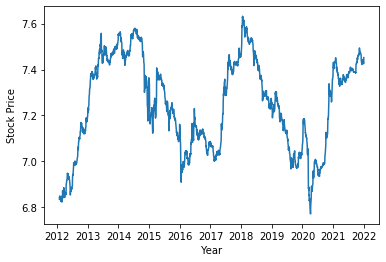

In [ ]:
plt.plot(data['Date'], data_new1['Price_T'])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


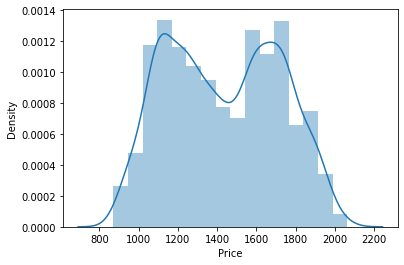

In [ ]:
sns.distplot(data_new1['Price'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

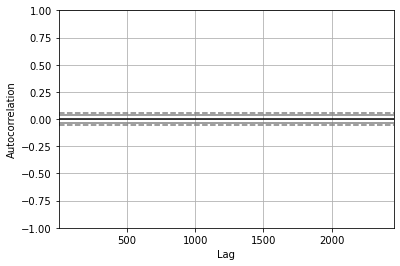

In [ ]:
# create an autocorrelation plot after standardizing with log return function
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_new['Price'])

Text(0, 0.5, 'Stock Price')

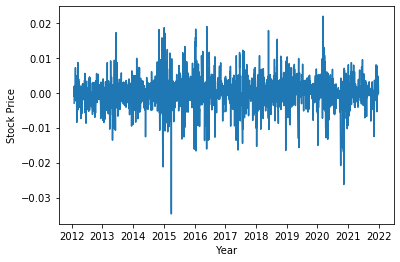

In [ ]:
plt.plot(data_new['Date'], data_new['Price'])
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

Splitting of the data into training and test

In [ ]:
# data3 = data2.drop(['Date', 'Vol.'], axis= 1)
# data3.dropna(axis= 0, inplace = True)

In [ ]:
# data3.head(3)

In [ ]:
# X = data_new1.iloc[:,:-1]
# # # del X['Vol.']
# # #X del (labels = 'Vol.', axis =0)
# y = data_new1.iloc[:, -1]

In [ ]:
n_points = len(data_new1)
train_points = int((2/3)*n_points)+1
X_train, X_test =data_new1.iloc[:,1:].values[:train_points],  data_new1.iloc[:,1:].values[train_points:  ]
y_train, y_test =data_new1.iloc[:,0].values[:train_points  ],  data_new1.iloc[:,0].values[train_points:  ]

In [ ]:
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * n_points)
test_size = int(test_ratio * n_points)
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = data_new1[:train_size][['Price_T','Open_T',	'High_T',	'Low_T']]
test = data_new1[train_size:][['Price_T','Open_T',	'High_T',	'Low_T']]

train_size: 1965
test_size: 491


In [ ]:
test

,Price_T,Open_T,High_T,Low_T
1965,7.560747,7.563258,7.567160,7.559064
1966,7.563258,7.550051,7.563979,7.549099
1967,7.550051,7.562593,7.562593,7.546795
1968,7.563325,7.552898,7.564275,7.552106
1969,7.552898,7.558318,7.562505,7.552689
...,...,...,...,...
2452,6.849300,6.844943,6.849586,6.843601
2453,6.844943,6.842875,6.845007,6.837333
2454,6.842000,6.843430,6.847124,6.840611
2455,6.843515,6.834346,6.843793,6.834249


In [ ]:
y_train = train['Price_T']

In [ ]:
X_train = train[['Open_T',	'High_T',	'Low_T']]

In [ ]:
X_train

,Open_T,High_T,Low_T
0,7.425918,7.452576,7.424589
1,7.425757,7.426150,7.424082
2,7.439330,7.440258,7.423813
3,7.438895,7.439553,7.438142
4,7.438607,7.439130,7.437354
...,...,...,...
1960,7.523217,7.524329,7.520083
1961,7.528708,7.528998,7.514298
1962,7.539298,7.540064,7.523395
1963,7.551670,7.552468,7.538937


In [ ]:
y_test = test['Price_T']

In [ ]:
X_test = test[['Open_T',	'High_T',	'Low_T']]

In [ ]:
# n_points = len(data)
# train_points = int(2/3*n_points)+1
# X_train, X_test =X.iloc[:,1:].values[:train_points],  X.iloc[:,1:].values[train_points:  ]
# y_train, y_test =y.iloc[:,0].values[:train_points],  y.iloc[:,0].values[train_points:  ]

In [ ]:
# X_train , X_test, y_train, y_test =train_test_split(X,y ,train_size=0.6, shuffle=True, random_state=0)

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1965, 3), (492, 3), (1965,), (492,))

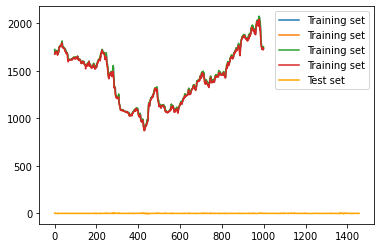

In [ ]:
# test_size = 1000

# data_new1_train = data_new1.iloc[:test_size, :-1]
# data_new1_test = data_new1.iloc[:-test_size, -1]

# plt.title('', size=20)
# plt.plot(data_new1_train, label='Training set')
# plt.plot(data_new1_test, label='Test set', color='orange')
# plt.legend();

In [ ]:
# X_train, X_test ,y_train, y_test =train_test_split(X,y,test_size=0.2, shuffle=False)

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

#Linear Regression

In [40]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  

LinearRegression()

In [41]:
# Score of the Linear Regression Model (Using the Test Data)
linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.8308086805286998


In [43]:
# Define the Real & Prediction Values

X_predict = np.array(data.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(data.drop(['Prediction'], 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [47]:
# Defining some Parameters

predicted_dates = []
recent_date = data.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

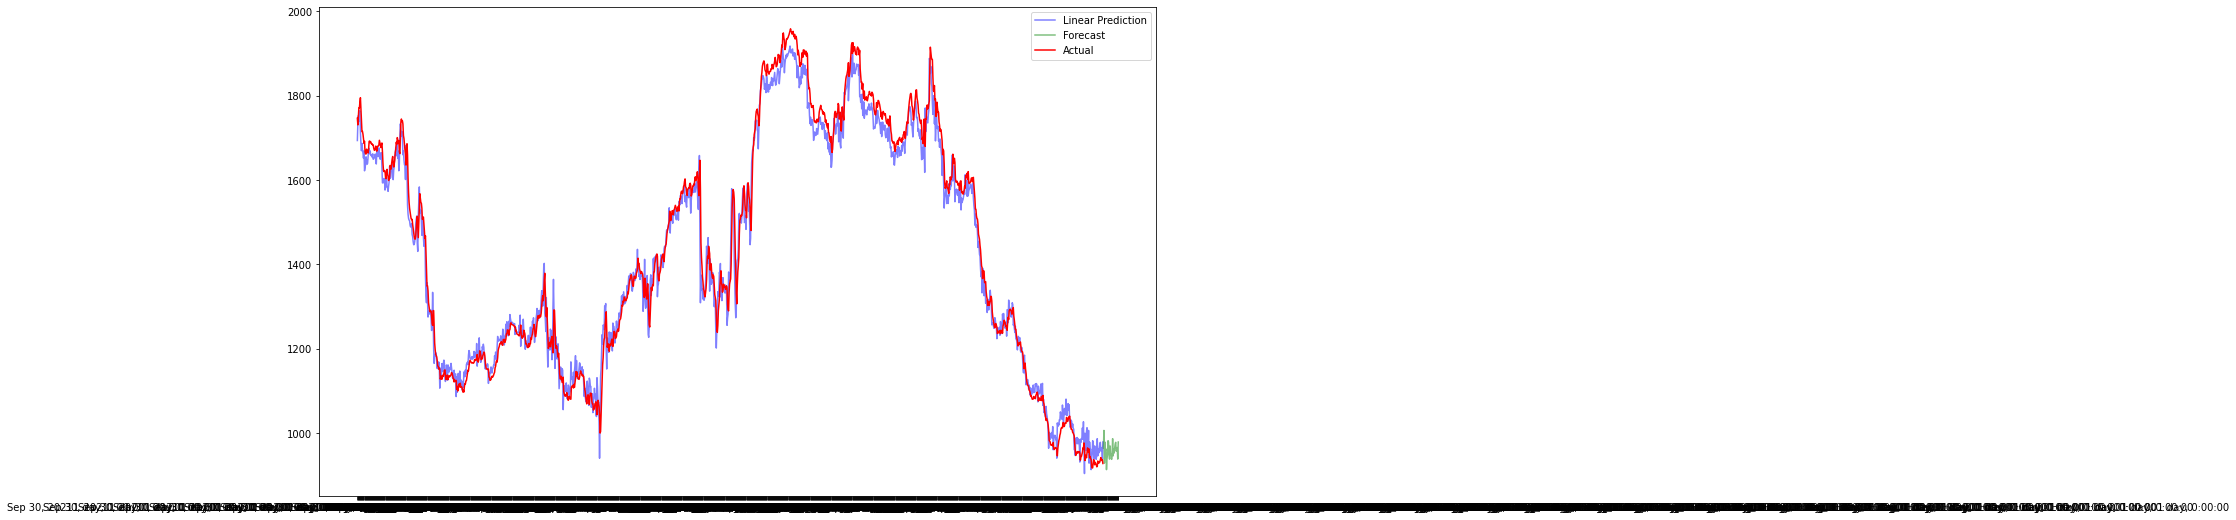

In [49]:
# Plotting the Actual and Prediction Prices

plt.figure(figsize=(15, 9))
plt.plot(data.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(data.index[display_at:], data['Price'][display_at:], label='Actual', color='red')
plt.legend()

In [ ]:
linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(data.drop(['Prediction'], 1)))
# print("MSE Train error :", np.sqrt(mean_squared_error(y_train,linear_model_predict_prediction)))
# print("MSE Test Error:", np.sqrt(mean_squared_error(y_test,linear_model_real_prediction)))
print(f' Rsquare:{r2_score(y_train, linear_model_predict_prediction)}')
print(f'Rsquare:{r2_score(y_test, linear_model_real_prediction)}')
print(f'MAE:{mean_absolute_error(y_train, linear_model_predict_prediction)}')
print(f'MAE:{mean_absolute_error(y_test, linear_model_real_prediction)}')

In [65]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
mse = mean_squared_error(y_test,y_predicted)
# MAE = mean_absolute_error(y_train, linear_model_predict_prediction)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print("MSE Train error :", mse)
# print('MAE:',MAE)

Root mean squared error:  13617.933266442522
R2 score:  0.8308086805286998
MSE Train error : 13617.933266442522


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


##LSTM

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

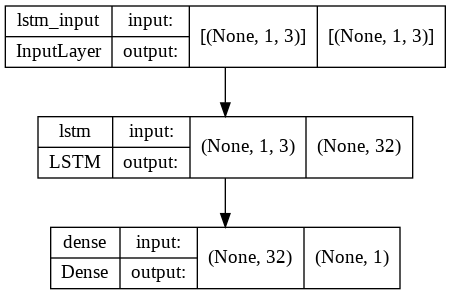

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
293/293 [==============================] - 3s 2ms/step - loss: 2188519.0000
Epoch 2/100
293/293 [==============================] - 1s 2ms/step - loss: 2153242.0000
Epoch 3/100
293/293 [==============================] - 1s 2ms/step - loss: 2065368.0000
Epoch 4/100
293/293 [==============================] - 1s 2ms/step - loss: 1937769.5000
Epoch 5/100
293/293 [==============================] - 1s 2ms/step - loss: 1787012.3750
Epoch 6/100
293/293 [==============================] - 1s 2ms/step - loss: 1622119.8750
Epoch 7/100
293/293 [==============================] - 1s 2ms/step - loss: 1449096.8750
Epoch 8/100
293/293 [==============================] - 1s 2ms/step - loss: 1273054.0000
Epoch 9/100
293/293 [==============================] - 1s 2ms/step - loss: 1098533.0000
Epoch 10/100
293/293 [==============================] - 1s 2ms/step - loss: 929575.0625
Epoch 11/100
293/293 [==============================] - 1s 2ms/step - loss: 769726.3125
Epoch 12/100
293/293 [==========

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

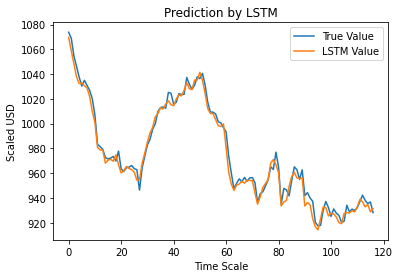

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [67]:
import statsmodels.api as sm

In [68]:
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          6.323e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:37:27   Log-Likelihood:                         -11939.
No. Observations:                1941   AIC:                                  2.389e+04
Df Residuals:                    1936   BIC:                                  2.392e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

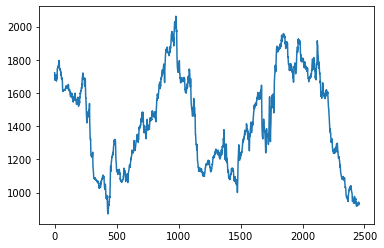

In [ ]:
data['Price'].plot()

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-800.36647644 1077.86840636  894.56147311]
Intercept: 881.6907761756977
Root mean squared error:  6.0624965541667475
R2 score:  0.9959982676744175


#Ridge

In [69]:
# Defining the Ridge Regression Model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train) 

Ridge()

In [72]:
# Score of the Ridge Regression Model (Using the Test Data)
ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.8308197007971964


In [85]:
# Define the Real & Prediction Values
ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(data.drop(['Prediction'], 1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


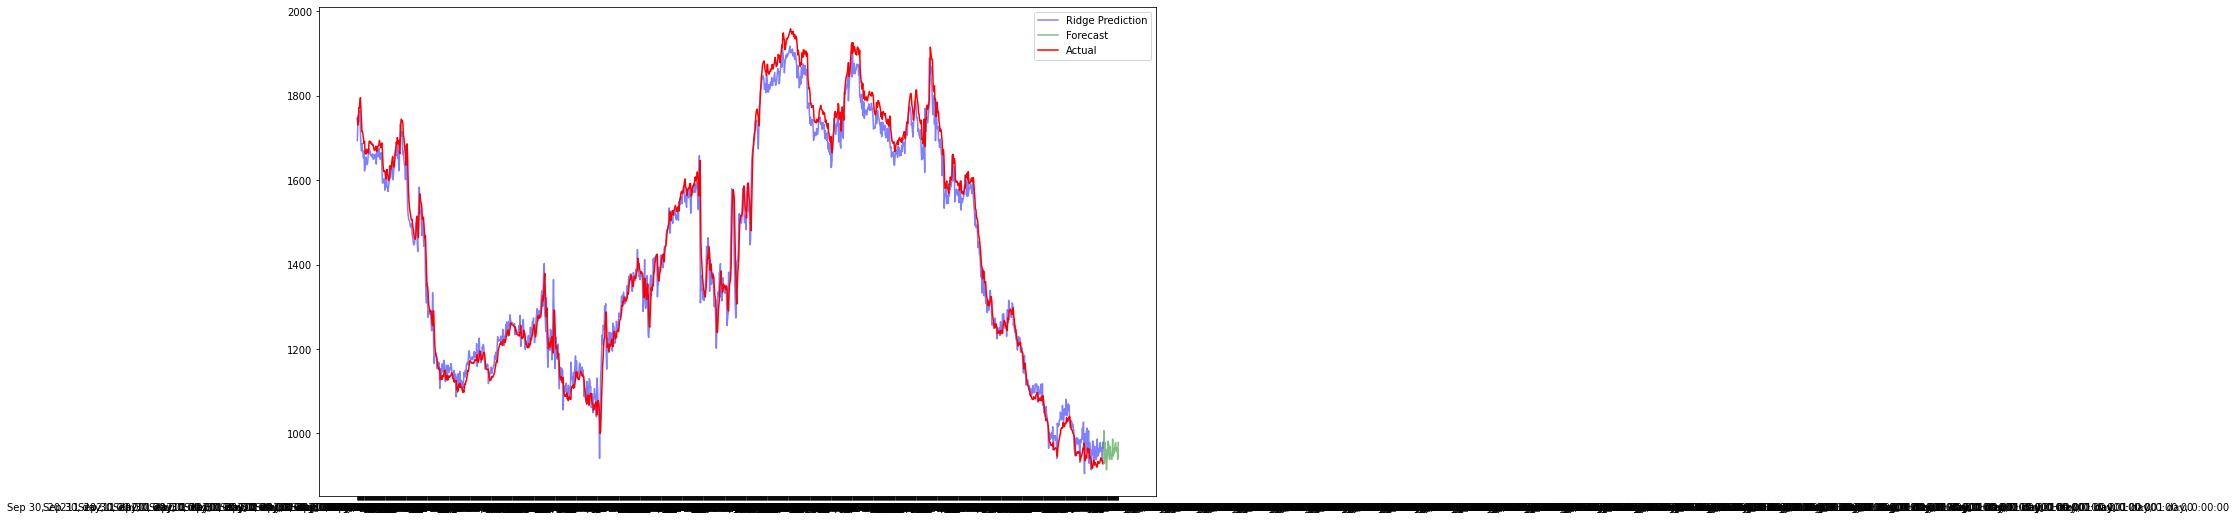

In [87]:
# Plotting the Actual and Prediction Prices
plt.figure(figsize=(15, 9))
plt.plot(data.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(data.index[display_at:], data['Price'][display_at:], label='Actual', color='red')
plt.legend()

In [77]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
print("Train error MSE: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge.predict(X_test)
print("Test error MSE: ",np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print("Rsquared train:",r2_score(y_train, pred_train_ridge))
print("Rsquared train:", r2_score(y_test, pred_test_ridge))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_ridge)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_ridge)}')

Train error MSE:  112.06620869384905
Test error MSE:  116.69586229505262
Rsquared train: 0.8456238843195968
Rsquared train: 0.8308087922175911
MAE Train:87.82224521102846
MAE Test:91.3985648529875


#LASSO

In [ ]:
# Defining the Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)   

In [82]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Train error MSE:",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
pred_test_lasso= model_lasso.predict(X_test)
print("Test error MSE:",  np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Rsquared train:",r2_score(y_train, pred_train_lasso))
print("Rsquared test:",r2_score(y_test, pred_test_lasso))
print(f'MAE Train:{mean_absolute_error(y_train, pred_train_lasso)}')
print(f'MAE Test:{mean_absolute_error(y_test, pred_test_lasso)}');

Train error MSE: 112.09279327385963
Test error MSE: 116.44399852169819
Rsquared train: 0.8455506327832156
Rsquared test: 0.8315383322265175
MAE Train:87.79530453596473
MAE Test:91.25180041034632


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+07, tolerance: 1.579e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#Elastic Net

In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
pred_test_enet= model_enet.predict(X_test)
print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_train, pred_train_enet))
print(r2_score(y_test, pred_test_enet))
print(f'MAE:{mean_absolute_error(y_train, pred_train_enet)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_enet)}')

Train error:  1.9521858203528928e-05
Test error: 2.575652049573129e-05
0.9999999999999942
0.9999999999999933
MAE:1.685232335760676e-05
MAE:2.3172729635776674e-05


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 3.382 (0.519)


# Model Improvement

#Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute


In [ ]:
X = data_new1.iloc[:,1:]
y = data_new1.iloc[:,0]

###Improved model for LASSO

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = Lasso()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8536100311925514

###Improved model for Linear Regression

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8506804721094245

###Improved model for Rigde

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=2456, random_state=None, shuffle=False)

#build multiple linear regression model
model2 = Ridge()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
sqrt(mean(absolute(scores)))

2.8506709088340623

(array([255.97528649]), array([1.29369965e-57]))

#GARCH NN

In [ ]:
# #Import the dataset for the analysis 
# data1 = pd.read_csv("/content/log_data.csv" , thousands =',')

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
res = sm.tsa.ARMA(data["Price"], (1,1)).fit(disp=-1)

In [ ]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(res.resid, lags=[5])

(array([19.86032735]), array([0.00132744]))

In [ ]:
!pip install arch

     |████████████████████████████████| 902 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 36.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from arch.__future__ import reindexing

In [ ]:
from arch import arch_model

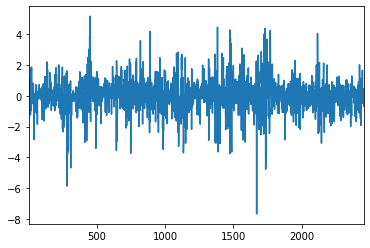

In [ ]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(2012, 1, 1)
en = dt.datetime(2021, 1, 12)
# data = arch.data.sp500.load()
market = data["Price"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [ ]:
returns.describe()

count    2456.000000
mean       -0.019878
std         1.027465
min        -8.078780
25%        -0.474266
50%         0.006983
75%         0.454313
max         5.863704
Name: Price, dtype: float64

In [ ]:
returns.to_csv("log1.csv", index= False)

In [ ]:
# n_test = 10
# train, test = returns[:-n_test], returns[-n_test:]

GARCH with constant Mean ; distribution = Normal

In [ ]:
from arch import arch_model
am = arch_model(train, vol='Garch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     31,   Neg. LLF: 3119.7245892768724
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3119.670111417554
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3119.67
Distribution:                  Normal   AIC:                           6245.34
Method:            Maximum Likelihood   BIC:                           6262.75
                                        No. Observations:                 2445
Date:                Sat, Apr 09 2022   Df Residuals:                     2445
Time:                        10:26:33   Df Model:                            0
        

In [ ]:
#fitting the model
# model_fit = am.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
yhat

In [ ]:
# print("Train error: ", np.sqrt(mean_squared_error(train,yhat)))
# pred_test_enet= model_enet.predict(X_test)
# print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))

In [ ]:
# bic_garch = []
# for p in range(1, 5):
#   for q in range(1, 5):
#     garch = arch_model(returns, mean='zero',vol='GARCH', p=p, o=0, q=q)\
#             .fit(disp='off')
#     bic_garch.append(garch.bic)
#     if garch.bic == np.min(bic_garch):
#       best_param = p, q
# garch = arch_model(returns, mean='zero', vol='GARCH',
#                 p=best_param[0], o=0, q=best_param[1])\
#       .fit(disp='off')
# print(garch.summary())
# forecast = garch.forecast(start=split_date[0])
# forecast_garch = forecast

In [ ]:
# forecasts_irfm = am.forecast(horizon=5)
forecasts =res.forecast(horizon = 5, reindex = False)
print(forecasts.variance.dropna().head())

GARCH with constant Mean ; distribution = Student T

In [ ]:
am2 = arch_model(returns, vol='Garch', p=1, o=0, q=1,dist="StudentsT", rescale= True, mean='Zero')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 2982.9874134873644
Iteration:     10,   Func. Count:     69,   Neg. LLF: 2976.251198158484
Iteration:     15,   Func. Count:     99,   Neg. LLF: 2975.05407942351
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2975.0538770571625
            Iterations: 17
            Function evaluations: 111
            Gradient evaluations: 17
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2975.05
Distribution:      Standardized Student's t   AIC:                           5958.11
Method:                  Maximum Likelihood   BIC:                           5981.33
                                              No. Observations

EGARCH with Normal Distribution

In [ ]:
from arch import arch_model
am = arch_model(train, vol='EGarch', p=1, o=0, q=1, dist='Normal', rescale= True, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 3112.6806161319737
Iteration:     10,   Func. Count:     74,   Neg. LLF: 3111.045525158113
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3111.0455213787877
            Iterations: 12
            Function evaluations: 91
            Gradient evaluations: 12
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3111.05
Distribution:                  Normal   AIC:                           6230.09
Method:            Maximum Likelihood   BIC:                           6253.30
                                        No. Observations:                 2445
Date:                Sat, Apr 09 2022   Df Residuals:                     2444
Time:       

EGARCH with Student T Distribution

In [ ]:
am2 = arch_model(train, vol='EGarch', p=1, o=0, q=1,dist="StudentsT", rescale= False, mean='constant')
# am = arch_model(returns,dist="StudentsT")
res = am2.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     48,   Neg. LLF: 2979.0638949096847
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2964.184836811527
Iteration:     15,   Func. Count:    125,   Neg. LLF: 2960.3109859290194
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2960.2721456032427
            Iterations: 19
            Function evaluations: 153
            Gradient evaluations: 19
                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2960.27
Distribution:      Standardized Student's t   AIC:                           5930.54
Method:                  Maximum Likelihood   BIC:                           5959.55
                                              No. Observatio

GJR GARCH with Normal distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="Normal")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3126.95
Distribution:                  Normal   AIC:                           6263.89
Method:            Maximum Likelihood   BIC:                           6292.92
                                        No. Observations:                 2455
Date:                Fri, Apr 08 2022   Df Residuals:                     2454
Time:                        13:07:50   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.3158e-04  1.766e-02 -7.452e-03      0.

GJR GARCH with Student T distribution

In [ ]:
am = arch_model(returns, p=1, o=1, q=1,dist="StudentsT")
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2974.08
Distribution:      Standardized Student's t   AIC:                           5960.16
Method:                  Maximum Likelihood   BIC:                           5995.00
                                              No. Observations:                 2455
Date:                      Fri, Apr 08 2022   Df Residuals:                     2454
Time:                              13:07:57   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='Normal', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 3135.2663226703053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 3120.033051893739
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3120.030178868511
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
                    Constant Mean - AVGARCH Model Results                     
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    AVGARCH   Log-Likelihood:               -3120.03
Distribution:                  Normal   AIC:                           6248.06
Method:            Maximum Likelihood   BIC:                           6271.28
                                        No. Observations:                 2455
Date:                Sat, Apr 09 2022   Df Residuals:                     2454
Time:        

In [ ]:
from arch import arch_model
am = arch_model(returns,p=1, o=0, q=1, dist='StudentsT', mean='constant',rescale= True, power=1.0)
# am = arch_model(returns,dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     43,   Neg. LLF: 2989.389691948121
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2966.460126880669
Iteration:     15,   Func. Count:    122,   Neg. LLF: 2965.394279697516
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2965.3942246979946
            Iterations: 18
            Function evaluations: 147
            Gradient evaluations: 18
                       Constant Mean - AVGARCH Model Results                        
Dep. Variable:                        Price   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          AVGARCH   Log-Likelihood:               -2965.39
Distribution:      Standardized Student's t   AIC:                           5940.79
Method:                  Maximum Likelihood   BIC:                           5969.82
                                              No. Observations

In [ ]:
t=(1,2,3)
e=(1,2,3)
t+e

(1, 2, 3, 1, 2, 3)

In [ ]:
list[range(5,1)]

list[range(5, 1)]